In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Kiev.csv")

In [3]:
print(data.describe())

               min          max       median
count  1535.000000  1535.000000  1535.000000
mean      2.652964    48.128300    15.265518
std       4.561292    38.639386    11.695650
min       0.000000     1.400000     0.000000
25%       0.000000    28.150000     6.985000
50%       0.800000    38.900000    12.400000
75%       3.400000    54.800000    20.500000
max      45.710000   450.890000   139.690000


In [4]:
print(data.loc[data["median"] == data["median"].max()])
print(data.loc[data["median"] == data["median"].min()])

         date    min    max  median
55  4/17/2020  45.71  370.4  139.69
           date  min  max  median
1320  10/8/2023  0.0  1.4     0.0


In [5]:
data['date'] = pd.to_datetime(data['date'])

In [6]:
data = data.set_index('date')

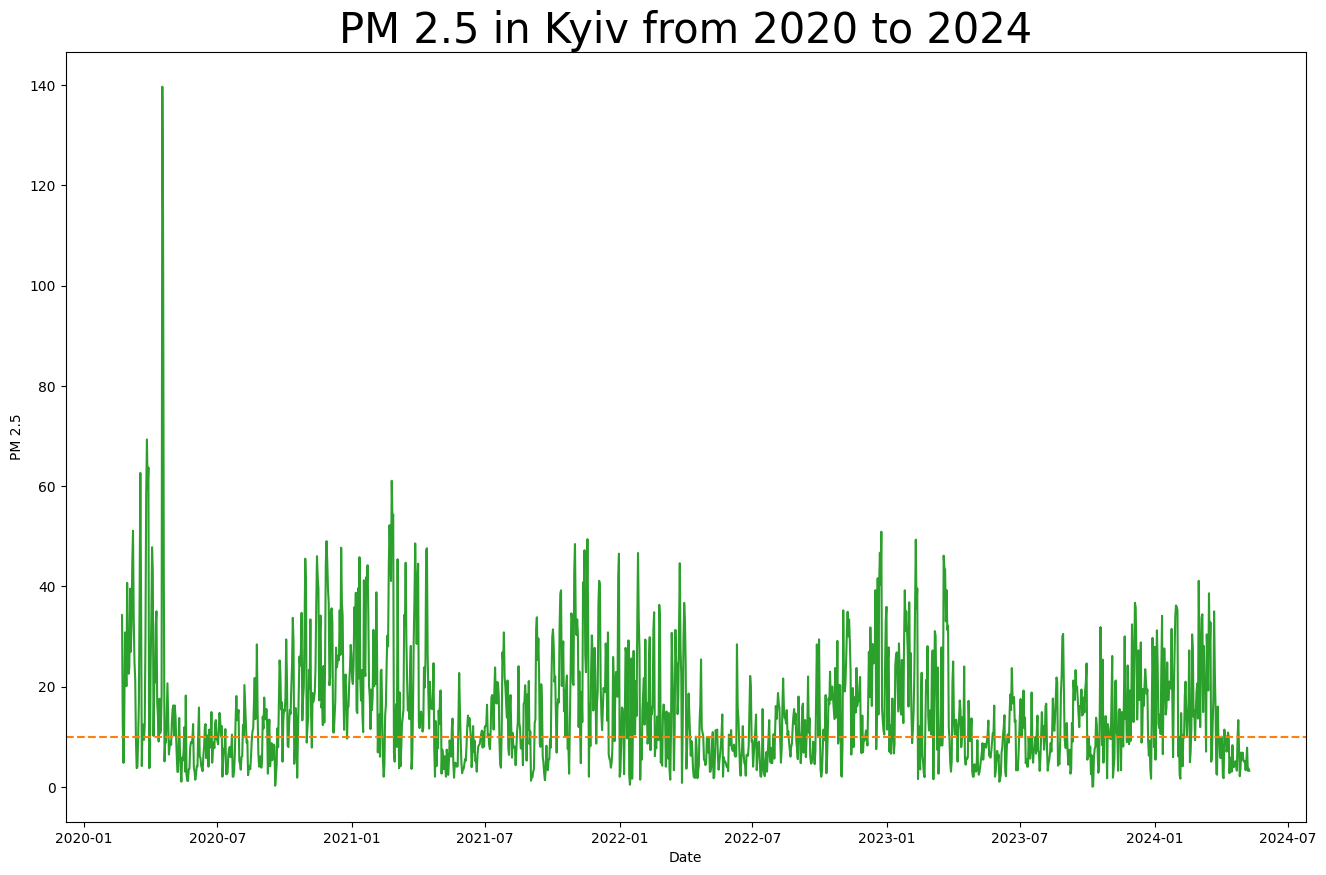

In [12]:
plt.figure(figsize=(16,10), dpi=100)
plt.plot(data.index, data["median"], color='tab:green', label='Median PM 2.5')
plt.gca().set(xlabel='Date', ylabel="PM 2.5")
plt.title("PM 2.5 in Kyiv from 2020 to 2024", fontsize=30)
plt.axhline(y=10, color='tab:orange', linestyle='--', label='PM 2.5 = 25')
plt.show()

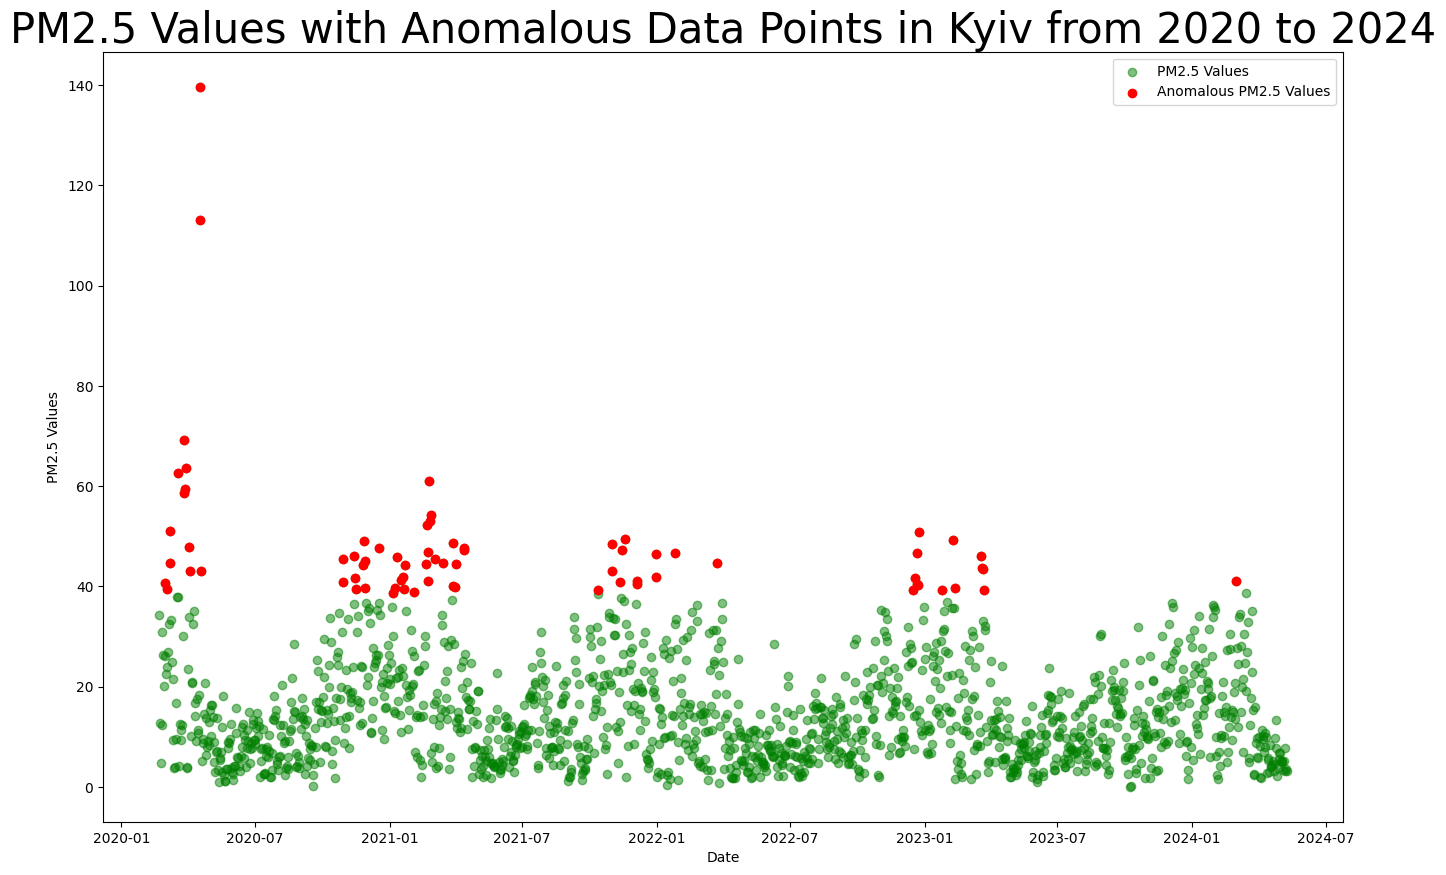

In [13]:
import matplotlib.pyplot as plt
from scipy import stats

data['z_score'] = stats.zscore(data["median"])
z_score_threshold = 2
anomalous_pm25_data = data[abs(data['z_score']) > z_score_threshold]

# Create the figure
plt.figure(figsize=(16, 10), dpi=100)

plt.scatter(data.index , data['median'], label='PM2.5 Values', color='green' ,  alpha=0.5)
plt.scatter(anomalous_pm25_data.index,  anomalous_pm25_data['median'], label='Anomalous PM2.5 Values', color='red'  )
plt.xlabel('Date')
plt.ylabel('PM2.5 Values')
plt.title('PM2.5 Values with Anomalous Data Points in Kyiv from 2020 to 2024', fontsize=30)
plt.legend()
plt.show()